In [6]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [4]:
#define state
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float

In [5]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight/(height**2)

    state['bmi'] = round(bmi,2)

    return state

In [8]:
#define graph
graph = StateGraph(BMIState)

#add node to graph
graph.add_node('calculate_bmi',calculate_bmi)

#add edges to graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi',END)

#compile the graph
workflow = graph.compile()


In [ ]:
#execute the graph
initial_state = {'weight_kg':80,'height_m':1.73}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73}


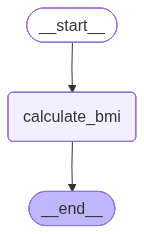

In [12]:
#to visualize the graph use 
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [14]:
#now as our basic graph comleted , now let also tell on the
#basis of bmi calculated tell wheather the person is fit , overweight , obese
# START->calculate_bmi->label_bmi->END

In [15]:
#define state
class BMIState_adv(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [17]:
def label_bmi(state:BMIState_adv) -> BMIState_adv:
        bmi = state[bmi]
        if bmi < 18.5:
                state["category"] = "Underweight"
        elif 18.5 <= bmi < 25:
                state["category"] = "Normal"
        elif 25 <= bmi < 30:
                state ["category"] = "Overweight"
        else:
                state["category"] = "Obese"
        return state


In [18]:
#define graph
graph = StateGraph(BMIState_adv)

#add node to graph
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('label_bmi',label_bmi)

#add edges to graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','label_bmi')
graph.add_edge('label_bmi',END)

#compile the graph
workflow = graph.compile()


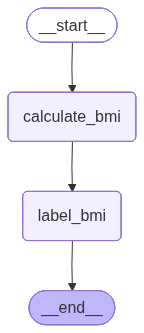

In [19]:
#to visualize the  updated graph use 
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())